In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
cos_dat_fold = 'E:/cosmos-data'

In [3]:
df_or_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_or_cat

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [213]:
df_or_cat.category.value_counts()

stage3    1525
stage2    1043
stage1     858
stage4     755
Name: category, dtype: int64

In [214]:
df_or_noextra = (
    df_or_cat
    .assign(extra = df_or_cat.ORyanID_23.apply(lambda x: True if type(x) == str and 'extra' in str(x) else False))
    .query('extra == False')
)

In [215]:
df_or_noextra.category.value_counts()

stage3    1290
stage2     931
stage4     616
stage1     509
Name: category, dtype: int64

## Separating 2015 and 2020 Only

In [216]:
df_no_2015 = df_or_noextra.query('ID_COSMOS2015 == -99')

In [217]:
df_2015 = df_or_noextra.query('ID_COSMOS2015 != -99')

## Matching Known IDs

In [218]:
with fits.open(f'{cos_dat_fold}/VLA_3GHz_counterpart_array_20170210_paper_smolcic_et_al.fits') as hdul:
    smol_rec = hdul[1].data

In [219]:
smol_rec['flag_COSMOS2015']

array([0, 1, 0, ..., 0, 0, 7])

In [220]:
def getting_smol_info(cosmos_2015id, smol_rec):
    
    row = smol_rec[(smol_rec['ID_CPT'] == cosmos_2015id) & (smol_rec['CAT_CPT'] == 'COSMOS2015')]
    if len(row) > 0:        
        if row['SFG'] == 'true':
            return 'SFG'
        else:
            return 'AGN'
    else:
        return np.nan
    
            
#     if flag == 1:
#         return 'no_COSMOS'
    
#     clsfs = []
#     for j in clsfs_nostrip:
#         clsfs.append(j.strip())
        
#     if clsfs[0] == 'true':
#         return 'SFG'
#     elif clsfs[1] == 'true':
#         return 'SFG'
#     else:
#         return 'AGN'
    
    # if clsfs[0] == 'true':
    #     return 'AGN'
    # elif clsfs[1] == 'true':
    #     return 'AGN'
    # elif clsfs[2] == 'true':
    #     return 'AGN'
    # elif clsfs[3] == 'true':
    #     return 'AGN'
    # elif clsfs[4] == 'true':
    #     return 'SFG'
    # elif clsfs[5] == 'true':
    #     return 'SFG'
    # elif clsfs[6] == 'true':
    #     return 'AGN'
    # elif clsfs[7] == 'true':
    #     return 'AGN'
    # elif clsfs[8] == 'true':
    #     return 'AGN'
    # else:
    #     return 'unknown'

In [221]:
smol_clsf = (
    df_2015.assign(gal_clsf = df_2015.ID_COSMOS2015.progress_apply(lambda x: getting_smol_info(x, smol_rec)))
)

100%|██████████| 3303/3303 [00:16<00:00, 196.92it/s]


In [222]:
smol_clsf.gal_clsf.value_counts()

SFG    278
AGN     72
Name: gal_clsf, dtype: int64

In [223]:
df_dna = smol_clsf[['ID', 'ORyanID_23', 'category', 'gal_clsf']].dropna()

In [224]:
df_dna

,ID,ORyanID_23,category,gal_clsf
12,844303,4000706649921,stage3,AGN
18,250320,4000707049267,stage3,SFG
27,1458688,4000711823990,stage1,AGN
41,509282,4000716471288,stage4,SFG
47,541991,4000716472139,stage3,SFG
...,...,...,...,...
3275,370241,4175103373,stage3,SFG
3297,1113336,6000438129666,stage1,SFG
3313,358919,6000511588261,stage3,SFG
3328,302055,6000529676819,stage2,SFG


In [225]:
df_dna.category.value_counts()

stage3    142
stage2     83
stage4     76
stage1     49
Name: category, dtype: int64

In [226]:
df_dna.query('category == "stage1"').gal_clsf.value_counts()

SFG    32
AGN    17
Name: gal_clsf, dtype: int64

In [227]:
df_dna.query('category == "stage4"').gal_clsf.value_counts()

SFG    66
AGN    10
Name: gal_clsf, dtype: int64

## Searching Based on Coords

In [228]:
# Function that selects the closest object in the MPA_JHU as the galaxy of interest.
def get_correct_smolcic_id(ra, dec, tab):
    cosmos_coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    mpa_coords = SkyCoord(ra = tab['RA_VLA_J2000'] * u.deg, dec = tab['DEC_VLA_J2000'] * u.deg, frame = 'fk5')
    
    seps = list(abs((cosmos_coord.separation(mpa_coords)).to(u.arcsec) / u.arcsec))
    
    min_ind = seps.index(min(seps))
    
    return {'smol_ID' : int(tab['ID_VLA'][min_ind]), 'RA' : tab[min_ind]['RA_VLA_J2000'], 'Dec' : tab[min_ind]['DEC_VLA_J2000']}

In [229]:
def matching_smolcic_ids(ra, dec, smol_rec):
    arcsec_sep_deg = 1 / (60 * 60)
    
    matching_tab = smol_rec[(smol_rec['RA_VLA_J2000'] > ra - arcsec_sep_deg) & (smol_rec['RA_VLA_J2000'] < ra + arcsec_sep_deg) & (smol_rec['DEC_VLA_J2000'] > dec - arcsec_sep_deg) & (smol_rec['DEC_VLA_J2000'] < dec + arcsec_sep_deg)]
    if len(matching_tab) < 0.5:
        return {'smol_ID' : np.nan, 'RA' : np.nan, 'Dec' : np.nan}
    elif len(matching_tab) == 1:
        return {'smol_ID' : int(matching_tab['ID_VLA'][0]), 'RA' : matching_tab['RA_VLA_J2000'][0], 'Dec' : matching_tab['DEC_VLA_J2000'][0]}
    elif len(matching_tab) > 1:
        return get_correct_smolcic_id(ra, dec, matching_tab)
    else:
        print('Somethings gone very wrong!!')
        sys.exit()

In [230]:
coords_dict = (
    df_or_cat[['ID', 'ALPHA_J2000', 'DELTA_J2000']]
    .rename(columns = {'ALPHA_J2000' : 'RA', 'DELTA_J2000' : 'DEC'})
    .set_index('ID').to_dict(orient = 'index')
)

In [231]:
smolcic_matched_dict = {}

In [232]:
done_ids = list(smolcic_matched_dict.keys())
for i in tqdm(list(coords_dict.keys())):
    if i in done_ids:
        continue
    
    smolcic_matched_dict[i] = matching_smolcic_ids(coords_dict[i]['RA'], coords_dict[i]['DEC'], smol_rec)

100%|██████████| 4181/4181 [00:21<00:00, 195.16it/s]


In [233]:
smolcic_df = pd.DataFrame.from_dict(smolcic_matched_dict, orient = 'index').dropna().reset_index().rename(columns = {'index' : 'ID'})

In [243]:
def getting_dets_ids(vla_id, smol_rec):
    row = smol_rec[(smol_rec['ID_VLA'] == vla_id)]
    if len(row) > 0:        
        if row['SFG'] == 'true':
            return 'SFG'
        else:
            return 'AGN'
    else:
        return

In [244]:
smolcic_df_clsfs = smolcic_df.assign(gal_clsf = smolcic_df.smol_ID.apply(lambda x: getting_dets_ids(x, smol_rec)))

In [246]:
smolcic_no_red = smolcic_df_clsfs[['ID', 'gal_clsf']]

In [247]:
df_no_merged = (
    smolcic_no_red
    .merge(df_or_cat, on = 'ID', how = 'left')
)

In [248]:
df_no_red = df_no_merged[['ORyanID_23', 'ID', 'category', 'ID_COSMOS2015', 'gal_clsf']]

In [254]:
df_no_red.drop_duplicates('ID', keep='first')

,ORyanID_23,ID,category,ID_COSMOS2015,gal_clsf
0,4000706649921,844303,stage3,607340,AGN
1,4000707047113,230625,stage3,230785,AGN
2,4000707049267,250320,stage3,244910,SFG
3,4000711823990,1458688,stage1,990736,AGN
4,4000716471288,509282,stage4,405672,SFG
...,...,...,...,...,...
451,4001217375957_extra,1407959,stage1,952997,AGN
452,4001217375957_extra,1410323,stage1,959789,SFG
453,4001074026762_extra,1455554,stage1,988978,SFG
454,4000711824171_extra,1465158,stage1,994841,AGN


In [255]:
df_dna

,ID,ORyanID_23,category,gal_clsf
12,844303,4000706649921,stage3,AGN
18,250320,4000707049267,stage3,SFG
27,1458688,4000711823990,stage1,AGN
41,509282,4000716471288,stage4,SFG
47,541991,4000716472139,stage3,SFG
...,...,...,...,...
3275,370241,4175103373,stage3,SFG
3297,1113336,6000438129666,stage1,SFG
3313,358919,6000511588261,stage3,SFG
3328,302055,6000529676819,stage2,SFG


In [265]:
df_dna_all = (
    pd.concat([df_no_red])
    .drop_duplicates('ID', keep='first')
    .dropna()
)

In [266]:
df_dna_all.gal_clsf.value_counts()

SFG    335
AGN    121
Name: gal_clsf, dtype: int64

In [267]:
print(df_dna_all.query('category == "stage1"').gal_clsf.value_counts())
print('')
print(df_dna_all.query('category == "stage2"').gal_clsf.value_counts())
print('')
print(df_dna_all.query('category == "stage3"').gal_clsf.value_counts())
print('')
print(df_dna_all.query('category == "stage4"').gal_clsf.value_counts())

SFG    45
AGN    39
Name: gal_clsf, dtype: int64

SFG    77
AGN    25
Name: gal_clsf, dtype: int64

SFG    135
AGN     37
Name: gal_clsf, dtype: int64

SFG    78
AGN    20
Name: gal_clsf, dtype: int64


In [268]:
print(df_or_noextra.category.value_counts())

stage3    1290
stage2     931
stage4     616
stage1     509
Name: category, dtype: int64


In [269]:
stage1_counts = df_dna_all.query('category == "stage1"').gal_clsf.value_counts()
stage2_counts = df_dna_all.query('category == "stage2"').gal_clsf.value_counts()
stage3_counts = df_dna_all.query('category == "stage3"').gal_clsf.value_counts()
stage4_counts = df_dna_all.query('category == "stage4"').gal_clsf.value_counts()

In [270]:
stage1_frac = stage1_counts['AGN'] / (stage1_counts['AGN'] + stage1_counts['SFG'])
stage2_frac = stage2_counts['AGN'] / (stage2_counts['AGN'] + stage2_counts['SFG'])
stage3_frac = stage3_counts['AGN'] / (stage3_counts['AGN'] + stage3_counts['SFG'])
stage4_frac = stage4_counts['AGN'] / (stage4_counts['AGN'] + stage4_counts['SFG'])

In [271]:
print(stage1_frac)
print(stage2_frac)
print(stage3_frac)
print(stage4_frac)

0.4642857142857143
0.24509803921568626
0.21511627906976744
0.20408163265306123


In [274]:
all_stage1_frac = stage1_counts['AGN'] / len(df_or_cat.query('category == "stage1"'))
all_stage2_frac = stage2_counts['AGN'] / len(df_or_noextra.query('category == "stage2"'))
all_stage3_frac = stage3_counts['AGN'] / len(df_or_noextra.query('category == "stage3"'))
all_stage4_frac = stage4_counts['AGN'] / len(df_or_noextra.query('category == "stage4"'))

In [275]:
print(all_stage1_frac)
print(all_stage2_frac)
print(all_stage3_frac)
print(all_stage4_frac)

0.045454545454545456
0.02685284640171858
0.02868217054263566
0.032467532467532464


## Adding in Chandra Properly

In [276]:
with fits.open(f'{cos_dat_fold}/chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits') as hdul:
    chandra_cat = hdul[1].data

In [277]:
# Function that selects the closest object in the MPA_JHU as the galaxy of interest.
def get_correct_chandra_id(ra, dec, tab):
    cosmos_coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    chandra_coords = SkyCoord(ra = tab['RA_x'] * u.deg, dec = tab['DEC_x'] * u.deg, frame = 'fk5')
    
    seps = list(abs((cosmos_coord.separation(chandra_coords)).to(u.arcsec) / u.arcsec))
    
    min_ind = seps.index(min(seps))
    
    return {'CHANDRA_ID' : tab[min_ind]['id_x'], 'RA' : tab[min_ind]['RA_x'], 'Dec' : tab[min_ind]['DEC_x']}

In [278]:
def matching_chandra_ids(ra, dec, chandra_cat):
    arcsec_sep_deg = 1 / (60 * 60)
    
    matching_tab = chandra_cat[(chandra_cat['RA_x'] > ra - arcsec_sep_deg) & (chandra_cat['RA_x'] < ra + arcsec_sep_deg) & (chandra_cat['DEC_x'] > dec - arcsec_sep_deg) & (chandra_cat['DEC_x'] < dec + arcsec_sep_deg)]
    if len(matching_tab) < 0.5:
        return {'CHANDRA_ID' : np.nan, 'RA' : np.nan, 'Dec' : np.nan}
    elif len(matching_tab) == 1:
        return {'CHANDRA_ID' : matching_tab['id_x'][0], 'RA' : matching_tab['RA_x'][0], 'Dec' : matching_tab['DEC_x'][0]}
    elif len(matching_tab) > 1:
        print('Multiple Options')
        return get_correct_chandra_id(ra, dec, matching_tab)
    else:
        print('Somethings gone very wrong!!')
        sys.exit()

In [279]:
df_tmp_merge = df_or_noextra[['ID', 'ALPHA_J2000', 'DELTA_J2000']].merge(df_dna_all, how = 'left', on = 'ID', indicator = True)

In [280]:
coords_dict_chand = (
    df_tmp_merge
    .query('_merge == "left_only"')
    [['ID', 'ALPHA_J2000', 'DELTA_J2000']]
    .rename(columns = {'ALPHA_J2000' : 'RA', 'DELTA_J2000' : 'DEC'})
    .set_index('ID')
    .to_dict(orient = 'index')
)

In [281]:
chandra_matched_dict = {}

In [282]:
done_ids = list(chandra_matched_dict.keys())
for i in tqdm(list(coords_dict_chand.keys())):
    if i in done_ids:
        continue
    
    chandra_matched_dict[i] = matching_chandra_ids(coords_dict_chand[i]['RA'], coords_dict_chand[i]['DEC'], chandra_cat)

100%|██████████| 2964/2964 [00:32<00:00, 91.73it/s]


In [283]:
chandra_df = pd.DataFrame.from_dict(chandra_matched_dict, orient = 'index').dropna()
len(chandra_df)

26

In [284]:
chandra_ids = chandra_df.reset_index().rename(columns = {'index': 'ID_2020'})

In [285]:
smol_ids = list(df_dna_all.ID)

In [286]:
chandra_ids.assign(in_smol = chandra_ids.ID_2020.apply(lambda x: True if x in smol_ids else False)).query('in_smol')

,ID_2020,CHANDRA_ID,RA,Dec,in_smol


In [287]:
def getting_chandra_info(chandra_id, chandra_cat):
    row = chandra_cat[chandra_cat['id_x'] == chandra_id]    
    hard_lum = row['Lx_210'][0]
    
    if hard_lum <= 43:
        return 'SFG'
    elif hard_lum > 43:
        return 'AGN'
    else:
        return np.nan

In [288]:
chandra_clsfs = (
    chandra_ids
    .assign(gal_clsf = chandra_ids.CHANDRA_ID.apply(lambda x: getting_chandra_info(x, chandra_cat)))
)

In [289]:
chandra_or_cat = (
    chandra_clsfs
    .merge(df_or_cat, left_on = 'ID_2020', right_on = 'ID', how = 'left')
    [['ORyanID_23', 'ID_2020', 'category', 'ID_COSMOS2015', 'gal_clsf']]
)

In [290]:
print(chandra_or_cat.query('category == "stage1"').gal_clsf.value_counts())
print('')
print(chandra_or_cat.query('category == "stage2"').gal_clsf.value_counts())
print('')
print(chandra_or_cat.query('category == "stage3"').gal_clsf.value_counts())
print('')
print(chandra_or_cat.query('category == "stage4"').gal_clsf.value_counts())

SFG    6
AGN    2
Name: gal_clsf, dtype: int64

SFG    2
AGN    2
Name: gal_clsf, dtype: int64

SFG    7
AGN    5
Name: gal_clsf, dtype: int64

SFG    2
Name: gal_clsf, dtype: int64


In [291]:
df_combined = (
    pd.concat([df_dna_all, chandra_or_cat])
)

In [292]:
df_combined.gal_clsf.value_counts()

SFG    352
AGN    130
Name: gal_clsf, dtype: int64

In [293]:
print(df_combined.query('category == "stage1"').gal_clsf.value_counts())
print('')
print(df_combined.query('category == "stage2"').gal_clsf.value_counts())
print('')
print(df_combined.query('category == "stage3"').gal_clsf.value_counts())
print('')
print(df_combined.query('category == "stage4"').gal_clsf.value_counts())

SFG    51
AGN    41
Name: gal_clsf, dtype: int64

SFG    79
AGN    27
Name: gal_clsf, dtype: int64

SFG    142
AGN     42
Name: gal_clsf, dtype: int64

SFG    80
AGN    20
Name: gal_clsf, dtype: int64


## The Bad Part

In [294]:
df_combined.category.value_counts()

stage3    184
stage2    106
stage4    100
stage1     92
Name: category, dtype: int64

In [295]:
print(df_or_cat.category.value_counts())

stage3    1525
stage2    1043
stage1     858
stage4     755
Name: category, dtype: int64


In [296]:
print(df_or_noextra.category.value_counts())

stage3    1290
stage2     931
stage4     616
stage1     509
Name: category, dtype: int64


In [297]:
stage1_counts = df_combined.query('category == "stage1"').gal_clsf.value_counts()
stage2_counts = df_combined.query('category == "stage2"').gal_clsf.value_counts()
stage3_counts = df_combined.query('category == "stage3"').gal_clsf.value_counts()
stage4_counts = df_combined.query('category == "stage4"').gal_clsf.value_counts()

In [298]:
stage1_frac = stage1_counts['AGN'] / (stage1_counts['AGN'] + stage1_counts['SFG'])
stage2_frac = stage2_counts['AGN'] / (stage2_counts['AGN'] + stage2_counts['SFG'])
stage3_frac = stage3_counts['AGN'] / (stage3_counts['AGN'] + stage3_counts['SFG'])
stage4_frac = stage4_counts['AGN'] / (stage4_counts['AGN'] + stage4_counts['SFG'])
stage_frac = np.array([stage1_frac, stage2_frac, stage3_frac, stage4_frac])

In [299]:
stage_frac

array([0.44565217, 0.25471698, 0.22826087, 0.2       ])

In [300]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

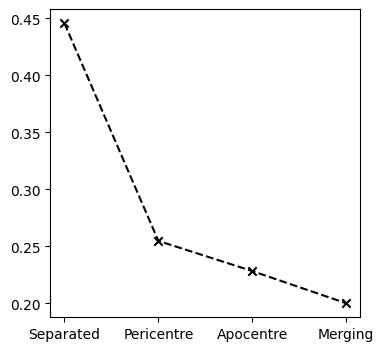

In [301]:
plt.figure(figsize = (4,4))
plt.scatter(x, stage_frac, color = 'black', marker = 'x')
plt.plot(x, stage_frac, color = 'black', linestyle='--')
plt.show()

In [302]:
all_stage1_frac = stage1_counts['AGN'] / len(df_or_cat.query('category == "stage1"'))
all_stage2_frac = stage2_counts['AGN'] / len(df_or_cat.query('category == "stage2"'))
all_stage3_frac = stage3_counts['AGN'] / len(df_or_cat.query('category == "stage3"'))
all_stage4_frac = stage4_counts['AGN'] / len(df_or_cat.query('category == "stage4"'))
all_frac = np.array([all_stage1_frac, all_stage2_frac, all_stage3_frac, all_stage4_frac])

In [303]:
print(all_stage1_frac)
print(all_stage2_frac)
print(all_stage3_frac)
print(all_stage4_frac)

0.047785547785547784
0.02588686481303931
0.02754098360655738
0.026490066225165563


In [304]:
normalisation = np.array([
    len(df_combined.query('category == "stage1"')) / len(df_combined.query('category == "stage1"')),
    len(df_combined.query('category == "stage2"')) / len(df_combined.query('category == "stage1"')),
    len(df_combined.query('category == "stage3"')) / len(df_combined.query('category == "stage1"')),
    len(df_combined.query('category == "stage4"')) / len(df_combined.query('category == "stage1"')),
])

In [305]:
normalisation

array([1.        , 1.15217391, 2.        , 1.08695652])

In [306]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

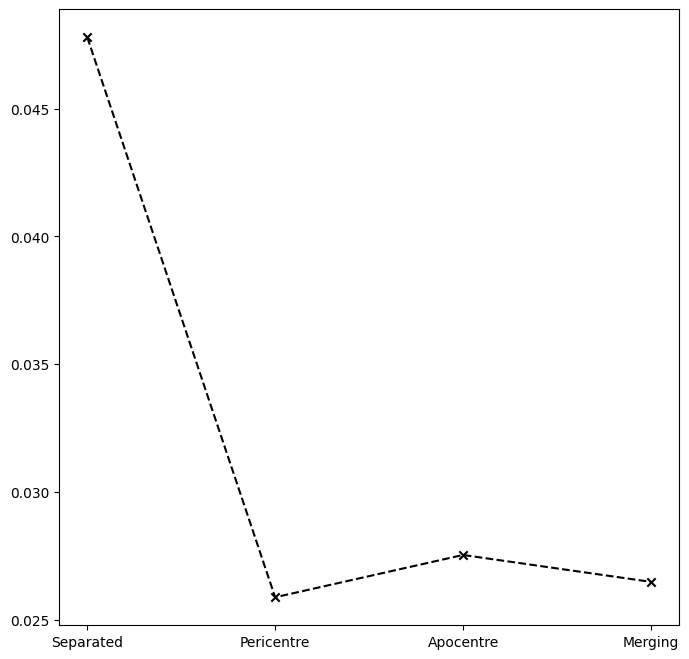

In [307]:
plt.figure(figsize = (8,8))
plt.scatter(x, all_frac, color = 'black', marker = 'x')
plt.plot(x, all_frac, color = 'black', linestyle='--')
plt.show()

## Introducing Weighting

In [308]:
def weight_dist(arrs, compare=1, bins=None, return_bins=True, renorm=False):
    # this will take 2 arrays of values from 2 different samples
    # e.g. redshift distributions from 2 samples
    # and return weights for each value such that the weighted
    # distributions of each sample will match.

    # note the bins need to be the same for both datasets
    # so either supply 1 number or 1 array of bin edges
    # also if you have fully specified the bins you don't need them returned
    # but if we've had to figure them out, you do need them returned
    # if you want to make sure you aren't under-weighting (e.g. if a whole dataset is
    # much larger than the other so you might always be able select >1 object
    # in dataset 1 for each object in dataset 2) then you can re-normalise to make
    # sure the max weight of both datasets is 1
    # Note, if the distributions cross this won't make a difference

    # weight arrays
    # w1 = np.zeros_like(arr1)
    # w2 = np.zeros_like(arr2)
    
    ws_list = []
    for i in arrs:
        ws_list.append(np.zeros_like(i))

    # if bins not specified, guess at them ourselves
    if bins is None:
        minsize = np.amin([    len(arr1),     len(arr2)])
        themin  = np.amin([np.amin(arr1), np.amin(arr2)])
        themax  = np.amax([np.amax(arr1), np.amax(arr2)])

        # on average 5 data points per bin, but at least 3 bins pls, max value is last bin edge
        bins = np.linspace(themin, themax, int(np.amax([(minsize/5)+1, 3])), endpoint=True)

    else:
        pass
        # because the np.histogram function can deal with distinguishing between number of bins or specific bins itself
        # so we don't have to
    hists = []
    hist1, thebins = np.histogram(arrs[compare], bins=bins)  # returns (counts_arr, bins_arr)
    # use the bins from hist1 to make hist2
    # note: for these purposes, any values of hist2 outside the minmax range of hist1 should have 0 weight
    # which is taken care of by the zeros_like initialisation of w1 and w2 above
    # so it's fine for them to be excluded below
    # hists.append(hist1)
    for i in arrs:
        hist_tmp, thebins = np.histogram(i, bins=thebins)
        hists.append(hist_tmp)

    # now step through the bins and assign weights
    for i_bin in range(len(thebins)-1):
        for i_hist in range(len(hists)):
            # zero-"index"ing these because they're indices and not values
            # and if I get them mixed up below I want this to error that there's no b2 or whatever
            b0 = thebins[i_bin]
            b1 = thebins[i_bin+1]

            count1 = hists[compare][i_bin]
            count2 = hists[i_hist][i_bin]

            # don't miss any values and don't double-count
            if i_bin == 0:
                in_bin1 = (arrs[compare] >= b0) & (arrs[compare] <= b1)
                in_bin2 = (arrs[i_hist] >= b0) & (arrs[i_hist] <= b1)
            else: 
                in_bin1 = (arrs[compare] >  b0) & (arrs[compare] <= b1)
                in_bin2 = (arrs[i_hist] >  b0) & (arrs[i_hist] <= b1)


            # don't divide by 0 in the rest of the if/else
            if (count1 == 0) | (count2 == 0):
                ws_list[compare][in_bin1] = 0.0
                ws_list[i_hist][in_bin2] = 0.0

            elif count1 < count2:
                # weight count2 values so the sum of wt2 in this bin equals count1
                # wt_fac will always be < 1
                wt_fac = float(count1)/float(count2)
                ws_list[compare][in_bin1] = 1.0
                ws_list[i_hist][in_bin2] = wt_fac

            else:
                # weight count1 values so the sum of wt1 in this bin equals count2
                # wt_fac will always be <= 1
                wt_fac = float(count2)/float(count1)
                ws_list[compare][in_bin1] = wt_fac
                ws_list[i_hist][in_bin2] = 1.0


    # now the weights should be determined
    # we can optionally re-normalise to make sure we are getting max value out of the datasets
    if renorm:
        if (np.sum(ws) > 0.00000) & (np.amax(w1) < 1.0):
            ws /= np.amax(ws)

        if (np.sum(ws) > 0.00000) & (np.amax(w2) < 1.0):
            ws /= np.amax(ws)


    if return_bins:
        return ws, thebins 
    else: 
        return ws_list

In [309]:
df_combined_mass = df_combined.merge(df_or_noextra[['ID', 'lp_mass_best']], left_on = 'ID_2020', right_on = 'ID', how = 'left').drop(columns = ['ID_2020'])

In [310]:
df_combined_mass

,ORyanID_23,ID_x,category,ID_COSMOS2015,gal_clsf,ID_y,lp_mass_best
0,4000706649921,844303.0,stage3,607340,AGN,NaN,NaN
1,4000707047113,230625.0,stage3,230785,AGN,NaN,NaN
2,4000707049267,250320.0,stage3,244910,SFG,NaN,NaN
3,4000711823990,1458688.0,stage1,990736,AGN,NaN,NaN
4,4000716471288,509282.0,stage4,405672,SFG,NaN,NaN
...,...,...,...,...,...,...,...
477,4001074024690,NaN,stage1,574966,SFG,793474.0,11.24425
478,4000753150821,NaN,stage1,546253,SFG,743564.0,10.64598
479,4000767040363,NaN,stage1,553512,SFG,757426.0,9.04703
480,4000778985207,NaN,stage3,664975,SFG,938996.0,10.93256


In [311]:
df_unknown = (
    df_or_cat
    .merge(df_combined_mass[['ID', 'gal_clsf']], on = 'ID', how = 'left')
    [['ORyanID_23', 'ID', 'category', 'lp_mass_best', 'gal_clsf', 'ID_COSMOS2015']]
    .query('gal_clsf != "AGN" and gal_clsf != "SFG"')
    .drop(columns = 'gal_clsf')
    .assign(gal_clsf = 'unknown')
)

KeyError: "['ID'] not in index"

In [920]:
df_unknown

,ORyanID_23,ID,category,lp_mass_best,ID_COSMOS2015,gal_clsf
0,4000705532455,816891,stage4,9.28590,590539,unknown
1,4000705533383,860686,stage3,10.44862,618751,unknown
2,4000705539941,1301188,stage2,8.72372,893328,unknown
3,4000705540034,1304538,stage3,9.96798,895502,unknown
4,4000705540064,1310001,stage3,10.41827,898397,unknown
...,...,...,...,...,...,...
3927,4001204758614_extra,1520733,stage4,9.27097,1030872,unknown
3928,4546055995_extra,1520749,stage2,9.50357,1029954,unknown
3929,4000927318133_extra,1523385,stage3,9.53909,1031020,unknown
3930,4000747939904_extra,1524909,stage3,9.76084,1034203,unknown


In [921]:
df_all = pd.concat([df_combined_mass, df_unknown])

In [922]:
df_all

,ORyanID_23,category,ID_COSMOS2015,gal_clsf,ID,lp_mass_best
0,4000815070677,stage2,-99,AGN,507364,9.84012
1,4000767041112,stage2,-99,AGN,787760,9.31051
2,6000518662663,stage2,-99,AGN,588501,10.48922
3,4000706649921,stage3,607340,AGN,844303,11.05237
4,4000707049267,stage3,244910,SFG,250320,10.56664
...,...,...,...,...,...,...
3927,4001204758614_extra,stage4,1030872,unknown,1520733,9.27097
3928,4546055995_extra,stage2,1029954,unknown,1520749,9.50357
3929,4000927318133_extra,stage3,1031020,unknown,1523385,9.53909
3930,4000747939904_extra,stage3,1034203,unknown,1524909,9.76084


In [923]:
all_s1 = np.array(df_all.query('category == "stage1"')['lp_mass_best'])
all_s2 = np.array(df_all.query('category == "stage2"')['lp_mass_best'])
all_s3 = np.array(df_all.query('category == "stage3"')['lp_mass_best'])
all_s4 = np.array(df_all.query('category == "stage4"')['lp_mass_best'])

In [986]:
weights = weight_dist([all_s1, all_s2, all_s3, all_s4], compare=0, bins = 10, renorm = False, return_bins = False)

In [987]:
stage1_weights = df_all.query('category == "stage1"').assign(weight = weights[0])
stage2_weights = df_all.query('category == "stage2"').assign(weight = weights[1])
stage3_weights = df_all.query('category == "stage3"').assign(weight = weights[2])
stage4_weights = df_all.query('category == "stage4"').assign(weight = weights[3])

In [988]:
weighted_agn_counts = np.array([
    np.sum(np.array(list(stage1_weights.query('gal_clsf == "AGN"').weight))),
    np.sum(np.array(list(stage2_weights.query('gal_clsf == "AGN"').weight))),
    np.sum(np.array(list(stage3_weights.query('gal_clsf == "AGN"').weight))),
    np.sum(np.array(list(stage4_weights.query('gal_clsf == "AGN"').weight)))
])
weighted_agn_counts

array([ 8.06246877, 20.86586515, 20.85561871, 10.        ])

In [ ]:
len(stage4_weights.query('gal_clsf == "SFG"'))

63

In [989]:
weighted_sfg_counts = np.array([
    np.sum(np.array(list(stage1_weights.query('gal_clsf == "SFG"').weight))),
    np.sum(np.array(list(stage2_weights.query('gal_clsf == "SFG"').weight))),
    np.sum(np.array(list(stage3_weights.query('gal_clsf == "SFG"').weight))),
    np.sum(np.array(list(stage4_weights.query('gal_clsf == "SFG"').weight)))
])
weighted_sfg_counts

array([25.42378811, 56.10783279, 73.85553958, 59.48258547])

In [990]:
weighted_all_counts = np.array([
    stage1_weights.weight.sum(),
    stage2_weights.weight.sum(),
    stage3_weights.weight.sum(),
    stage4_weights.weight.sum(),
])
weighted_all_counts

array([665., 766., 793., 665.])

In [991]:
weighted_fracs = weighted_agn_counts / (weighted_all_counts)
weighted_fracs

array([0.01212401, 0.02724003, 0.02629965, 0.01503759])

In [992]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

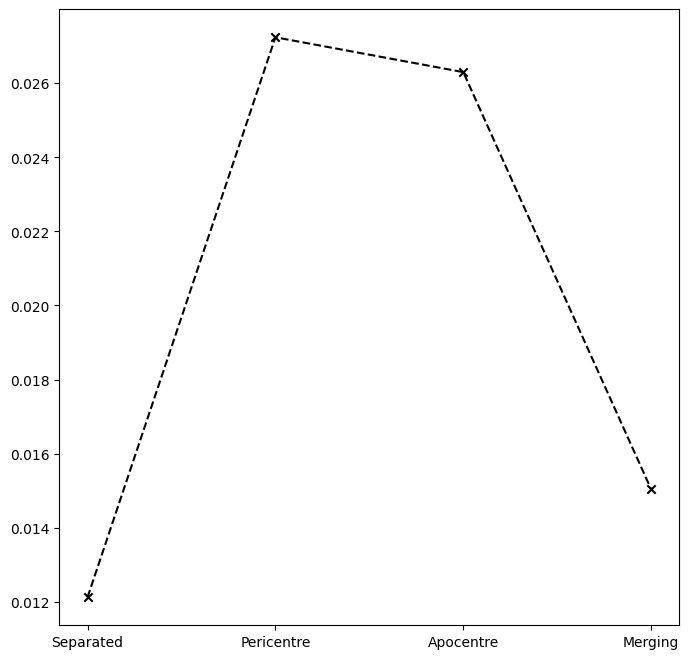

In [993]:
plt.figure(figsize = (8,8))
plt.scatter(x, weighted_fracs, color = 'black', marker = 'x')
plt.plot(x, weighted_fracs, color = 'black', linestyle='--')
plt.show()